# ch13_데이터 시각화

1 데이터 준비<br>
2 미적속성설정 - sns.set(style='darkgrid,white...'...,context='notebook,...'.....,palette='deep,muted,bright,pastel....')<br>
3 그래프 함수 : 1) 관계형그래프 : scatterplot,lineplot ->relplot(서브플롯)<br>
                <&nbsp><&nbsp>2) 범주형그래프 : stripplot, swarmplot, barplot, barhplot, countplot, pointplot, violinplot, boxplot,boxexplot 
                                    -> catplot(서브플롯)<br>
                       <&nbsp><&nbsp>           3) 쌍관계그래프 : pairplot<br>
                              <&nbsp><&nbsp>      4) 밀도그래프<br>
                                    <&nbsp><&nbsp>5) 회귀그래프 regplot<br>
4 다중 그래프를 위한 FacetGrid

In [2]:
from matplotlib import pyplot as plt
#주피터노트북이 실행되는 브라우저에서 시각화를 해라...
%matplotlib inline
#그래프 해상도를 높임. 'png'(기본값),'jpge','svg','pdf'
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
#한글 기본폰트 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) #축
#원하는 한글 폰트 지정
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)

## 3절. Seaborn
    - matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
        * 공식사이트 : http://seaborn.pydata.org
        * seaborn API : http://seaborn.pydata.org/api.html
    - Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
        1) 데이터 준비
        2) 미적속성 설정
        3) 함수를 이용하여 그래프 그리기
        4) 그래프 출력, 저장

### 3.1 데이터 준비하기

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris.info() # iris 열의 dtype, 전체 행수, 열별 결측치를 제외한 데이터 개수, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
titanic = sns.load_dataset('titanic')
titanic.head()
#survived 생존여부, pclass 티켓클래스1,2,3등석, sibsp : 함께탑승한 형제,배우자수
#parch:함께탑승한 부모,아이수, fare=탑승료

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 3.2 미적 속성 설정하기 ( style, context, palette )

#### 1) 그래프 스타일 지정

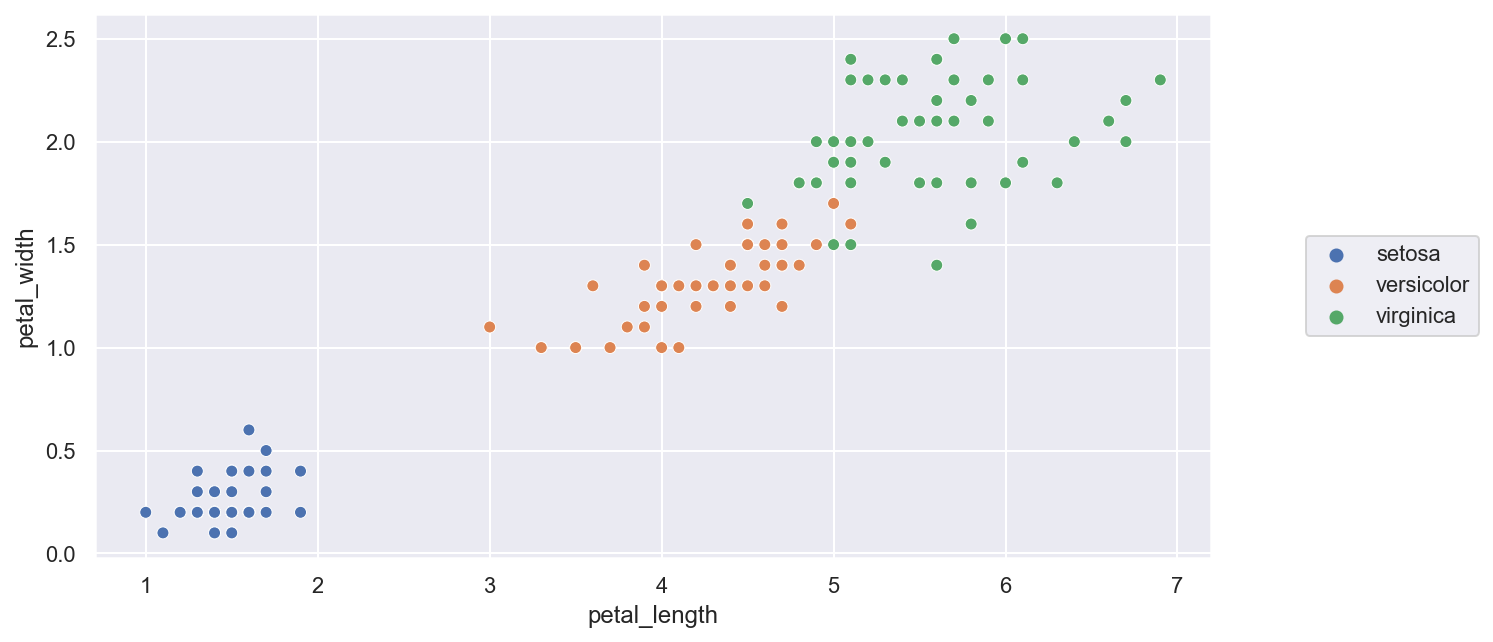

In [26]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid') # darkgrid, whithgrid,dark,white,ticks
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

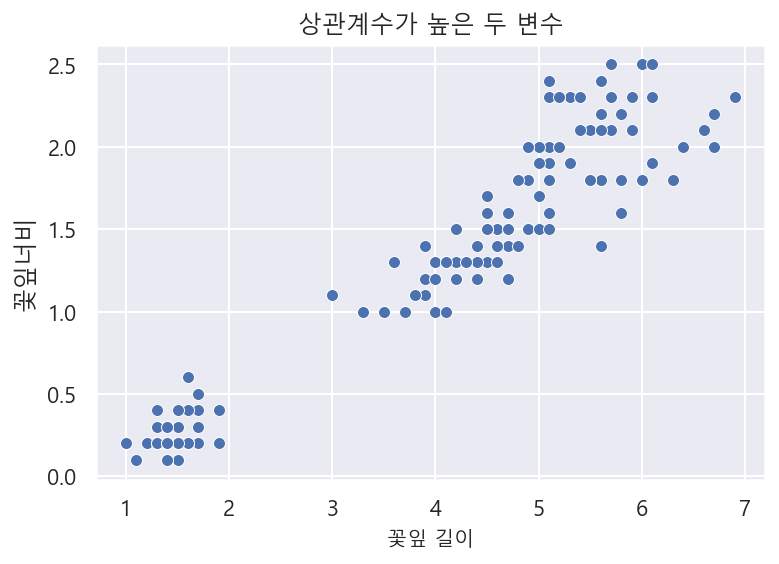

In [32]:
ax=sns.scatterplot(data=iris, x='petal_length', y='petal_width')
ax.set(title='상관계수가 높은 두 변수', ylabel='꽃잎너비')
ax.set_xlabel('꽃잎 길이', fontsize=10)
plt.show()

#### 2) context지정(비율) 

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

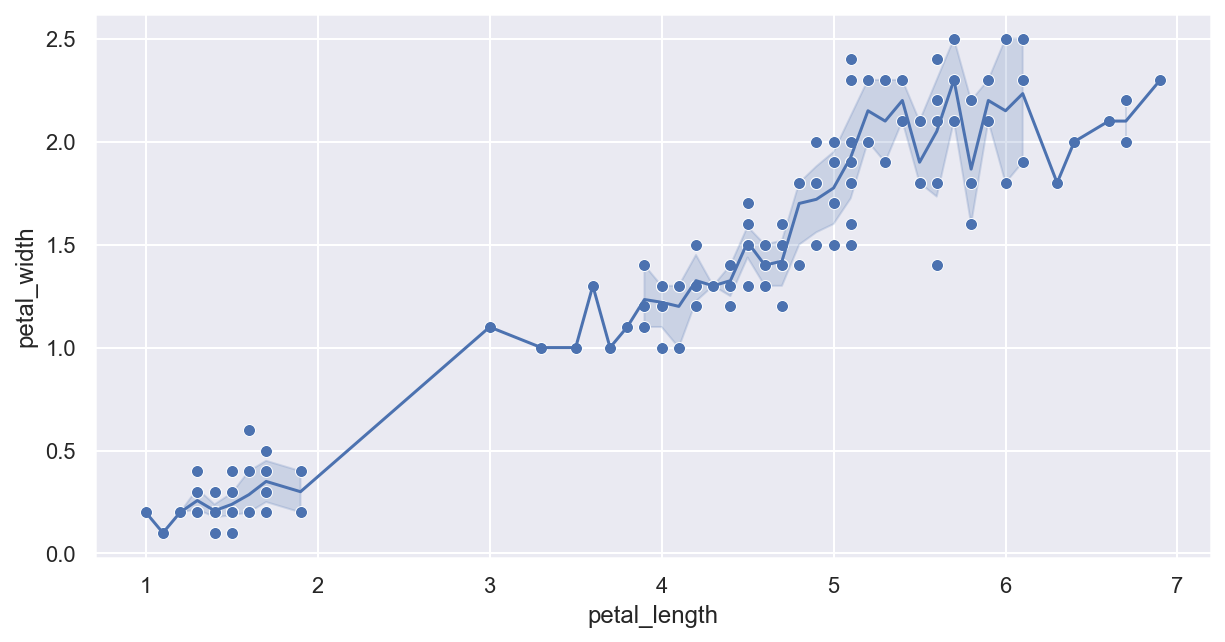

In [34]:
plt.figure(figsize=(10,5))
sns.set(context='notebook') # notebook(1배율, 기본값), paper(0.8배울), talk(1.3배율), poster(1.8배율)
sns.lineplot(data=iris, x='petal_length', y='petal_width')
sns.scatterplot(data=iris, x='petal_length', y='petal_width')

### 3.3 컬러 팔레트
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette<br>
https://matplotlib.org/tutorials/colors/colormaps.html<br>
https://seaborn.pydata.org/tutorial/color_palettes.html<br>
http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png<br>

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

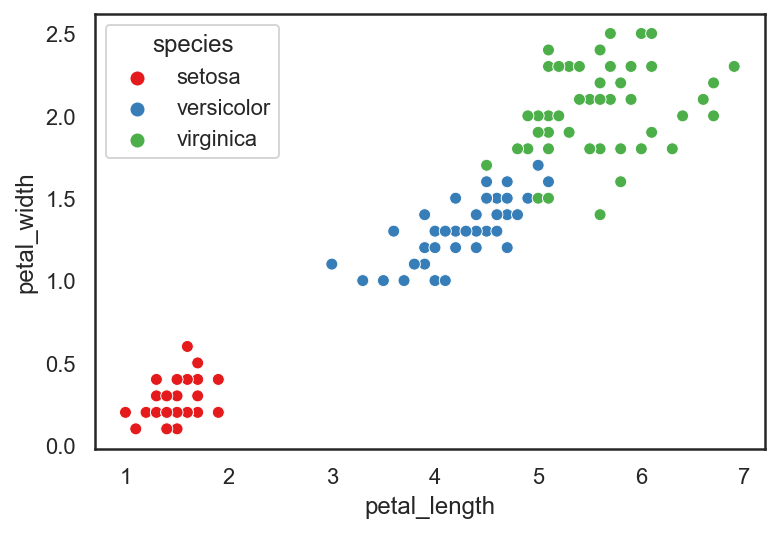

In [78]:
sns.set(palette='Set1',style='white')
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

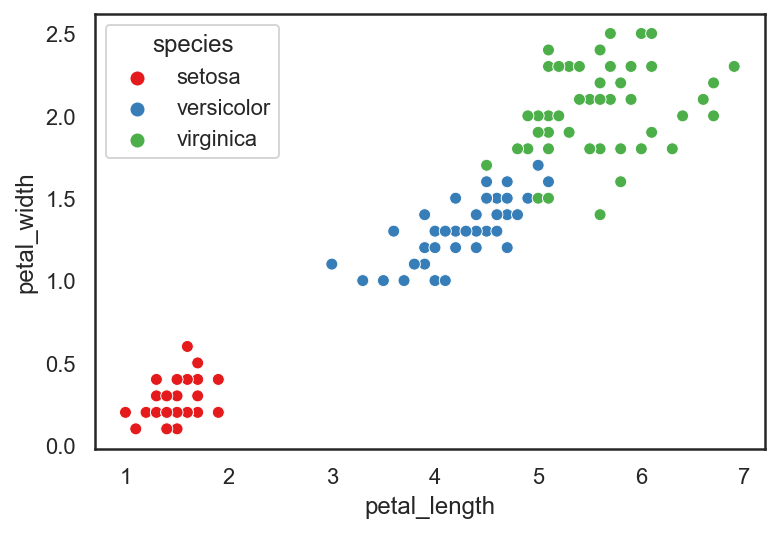

In [84]:
sns.set_palette=("Set1",2) #색깔 2개
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

### 3.4 Seaborn 함수로 그래프 그리기

#### 1) Relational plots : 관계형 그래프
    *scatterplot, lineplot, relplot(서브플롯제공)

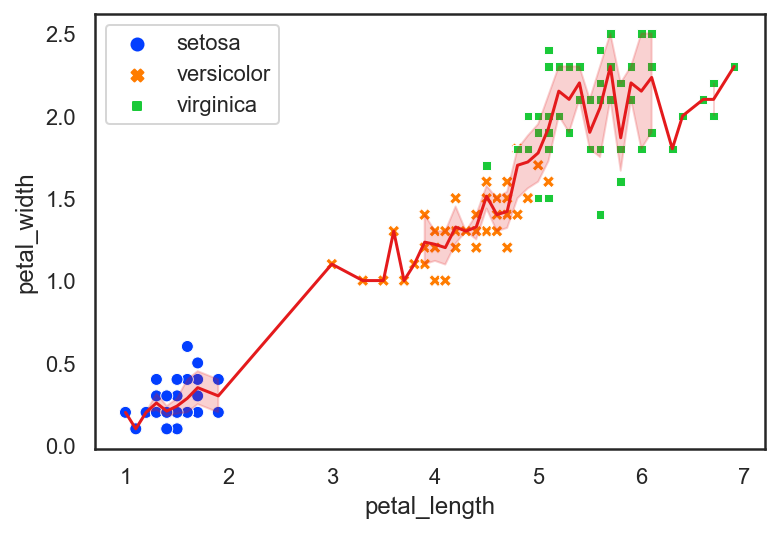

In [85]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='bright', style='species')
sns.lineplot(data=iris, x='petal_length', y='petal_width')
plt.show()

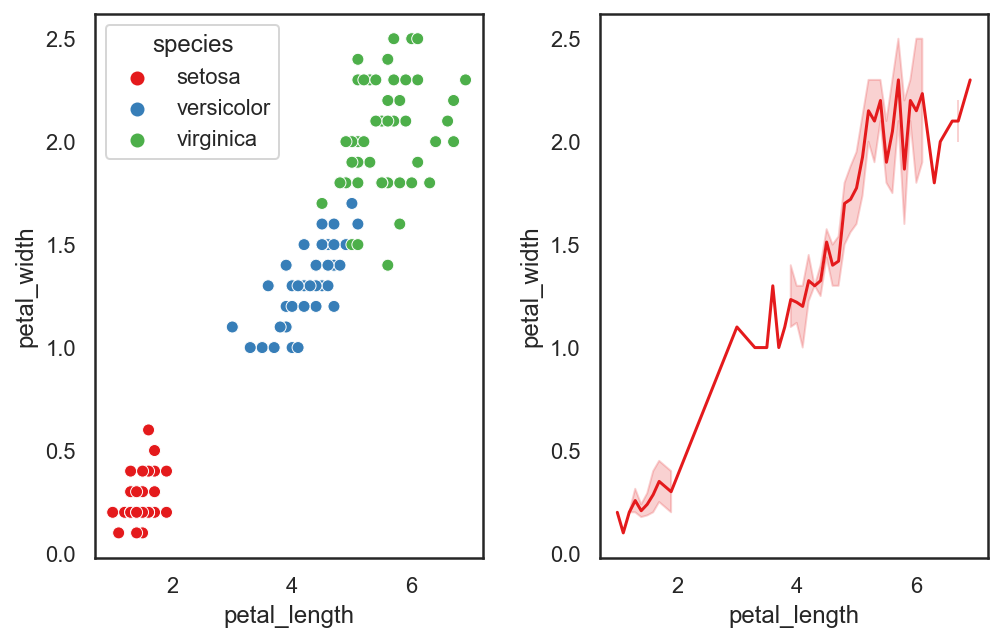

In [86]:
fig, axes = plt.subplots(ncols=2, figsize=(8,5))
plt.subplots_adjust(wspace=0.3) #서브플롯 사이의 패딩 너비 조정ㅀ
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=axes[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width', ax=axes[1])
plt.show()

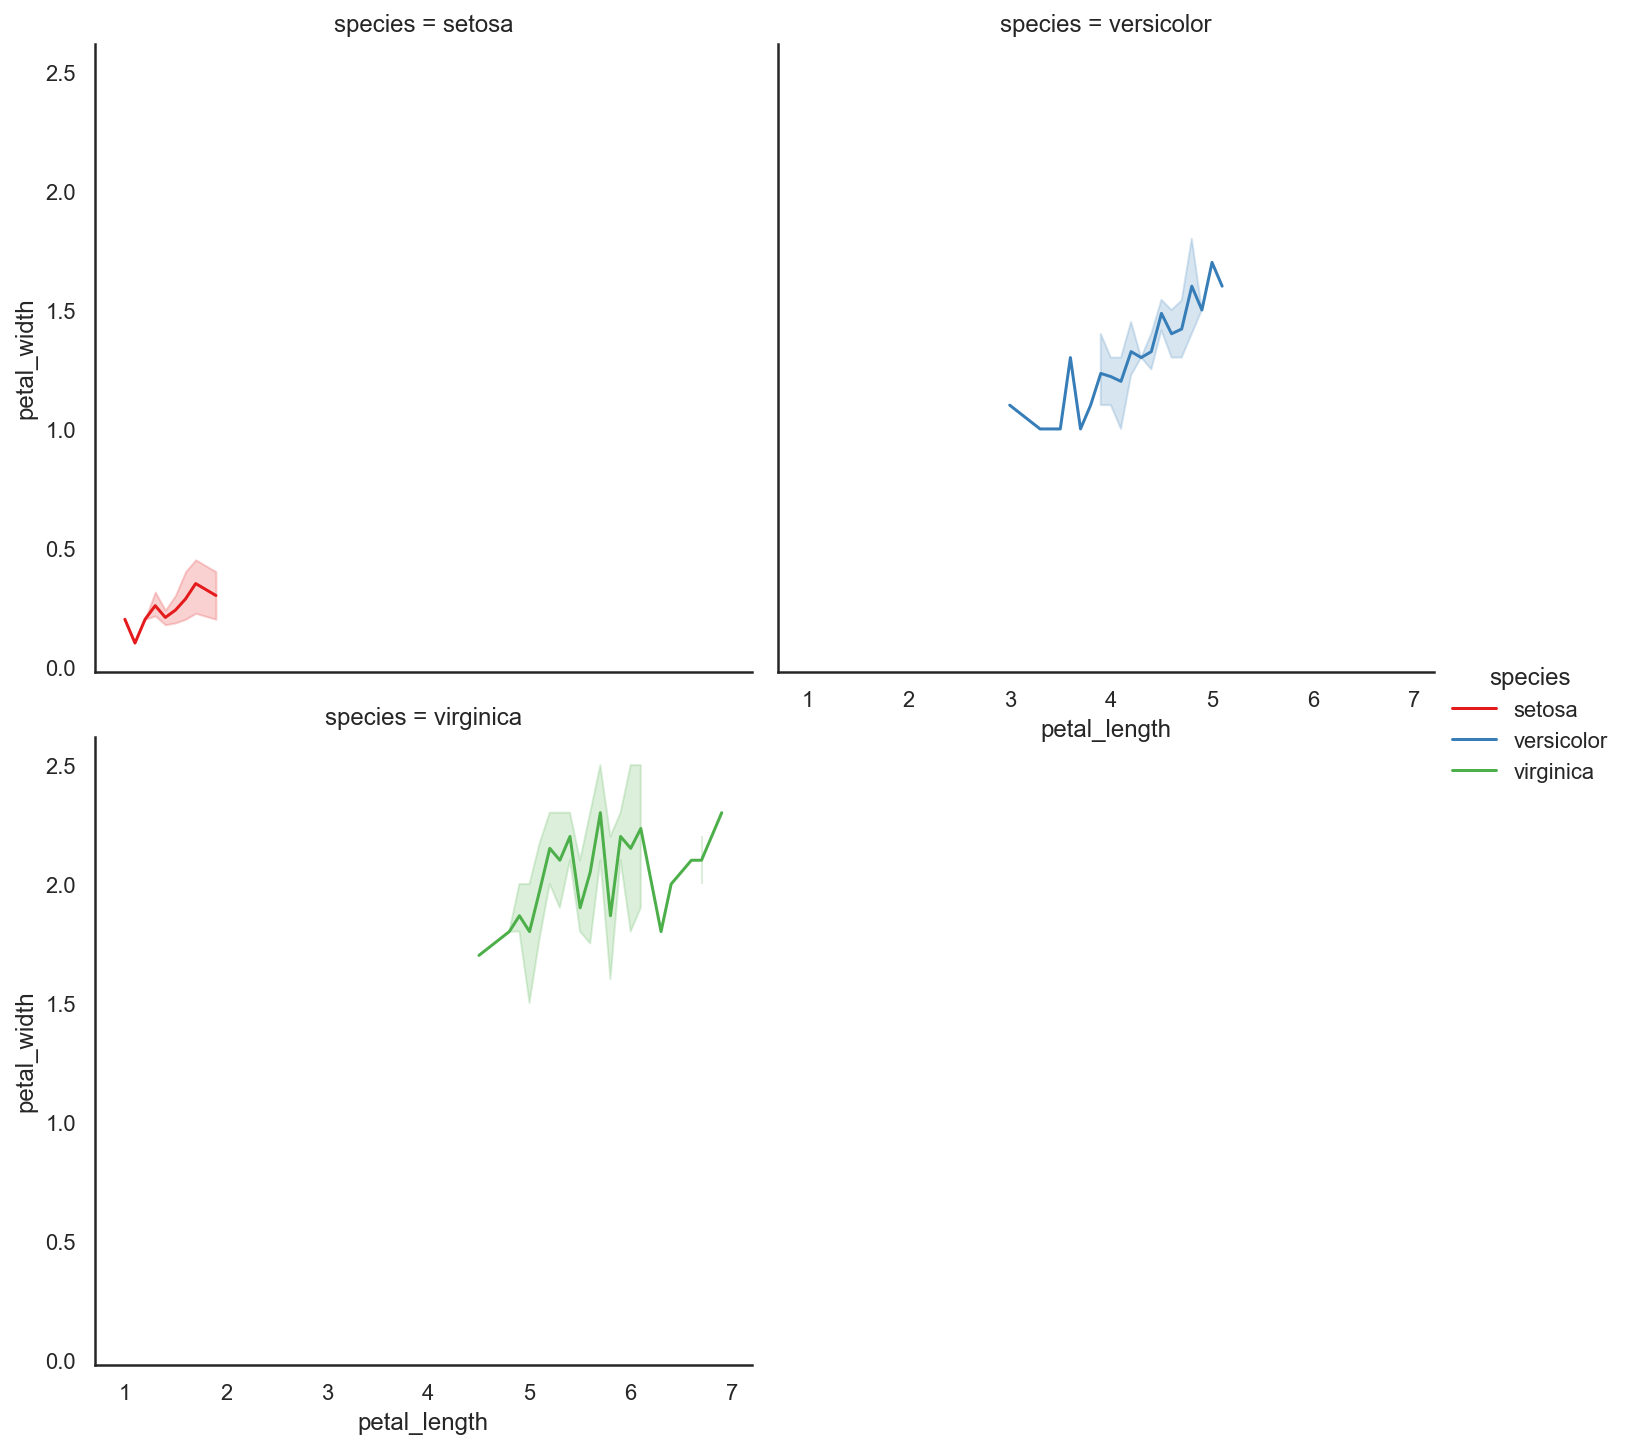

In [89]:
# lineplot을 서브플롯으로(종별) => relplot(관계형 그래프에서 서브플롯을 그리는 함수)
sns.relplot(kind='line', #기본값은 scatter
            data=iris, x='petal_length', y='petal_width', hue='species', col = 'species', # col단위로 서브플롯 표현
               col_wrap=2) # 한줄에 표현될 서브플롯 수

#### 2) categorical plots : 범주형 그래프

<AxesSubplot:xlabel='species', ylabel='petal_width'>

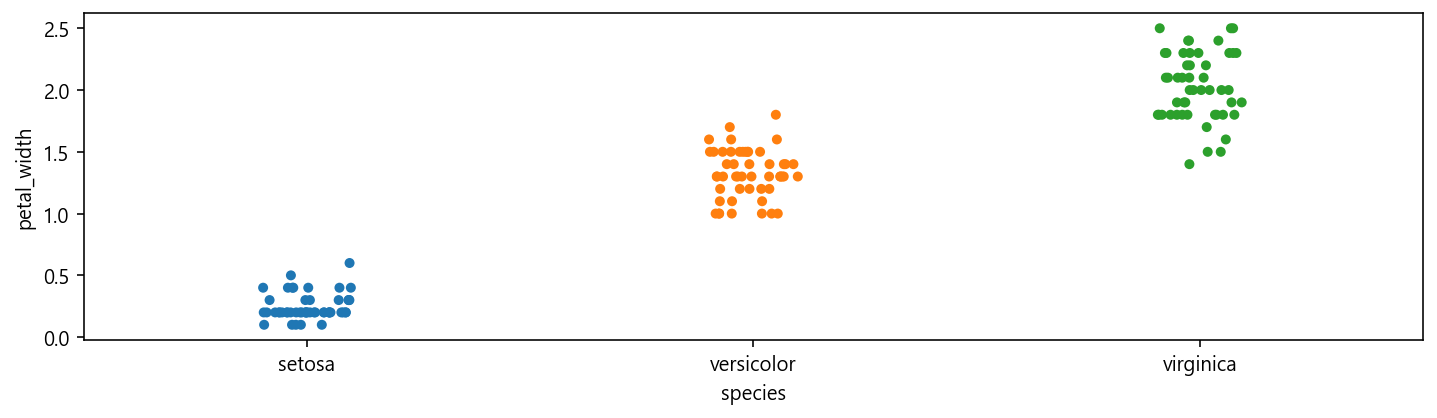

In [5]:
plt.figure(figsize=(12,3))
# 종별 petal_width의 값을 산점도 : x축이 범주형 데이터일 경우 scatterplot 적합하지 않아
# x축이 범주형일 때 쓰는 산점도1
sns.stripplot(data=iris, x='species', y='petal_width')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

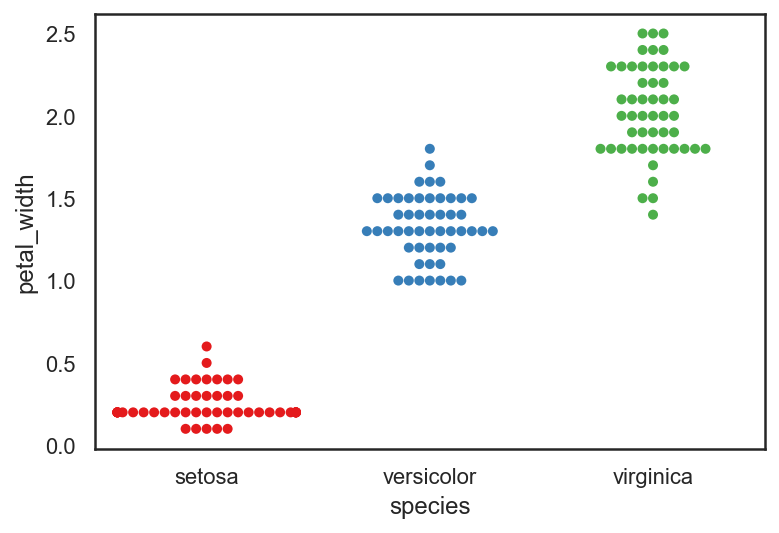

In [93]:
# x축이 범주형일 때 쓰는 산점도2 : 산점도들이 중첩되지 않게
sns.swarmplot(data=iris, x='species', y='petal_width')
#sns.stripplot(data=iris, x='species', y='petal_width', color='b')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

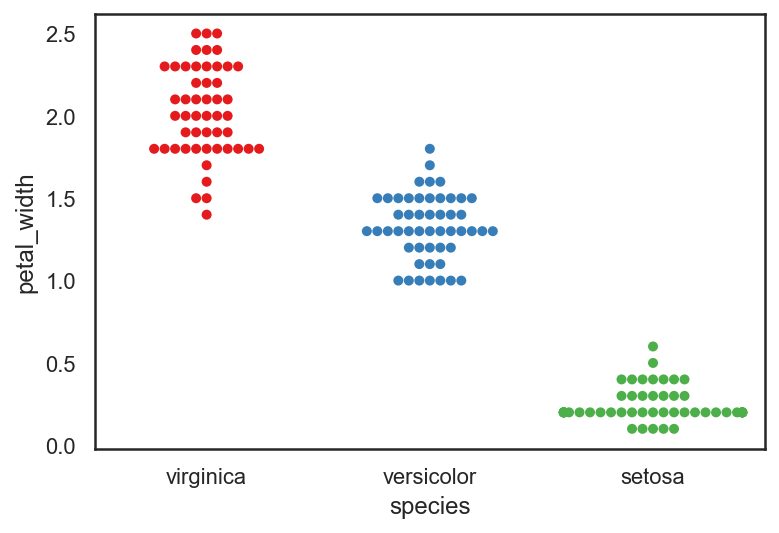

In [95]:
sns.swarmplot(x='species', y='petal_width', data=iris.sort_values('petal_width', ascending=False))

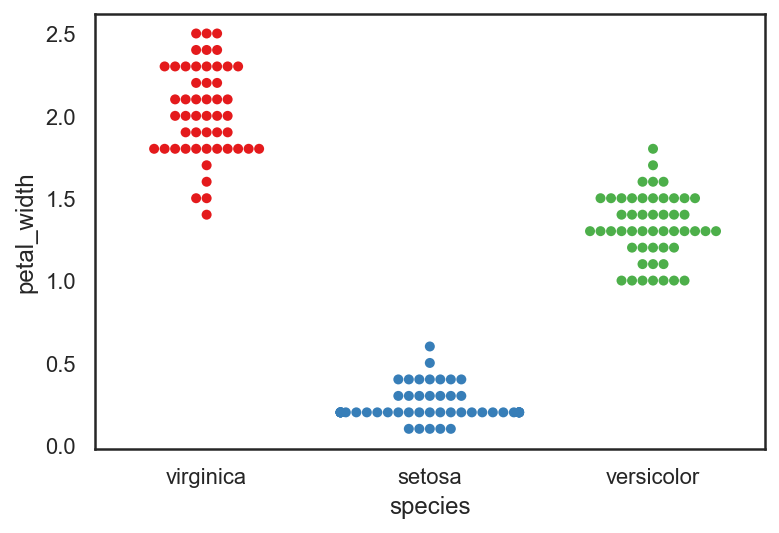

In [97]:
sns.swarmplot(x='species', y='petal_width', data=iris, order=['virginica','setosa','versicolor'])
plt.show()

In [98]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='survived'>

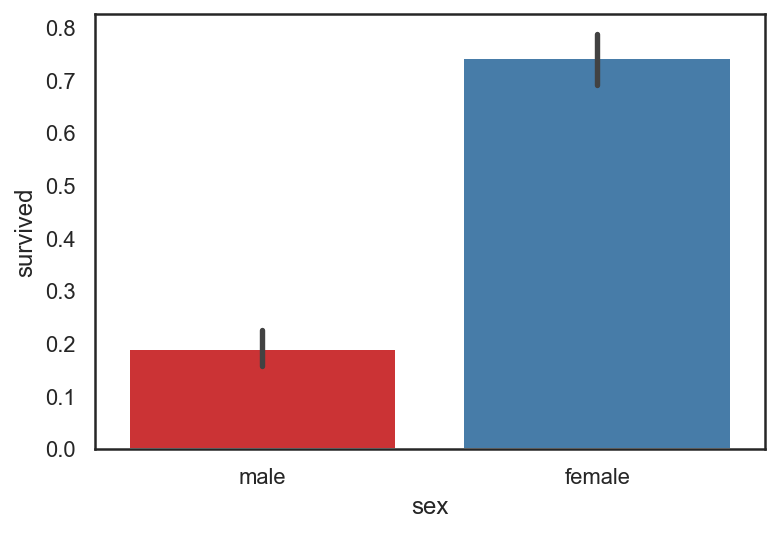

In [110]:
# 성별별 survived의 평균을 막대그래프로
titanic.groupby('sex')['survived'].mean()
sns.barplot(data=titanic, x='sex', y='survived')

<AxesSubplot:xlabel='sex', ylabel='survived'>

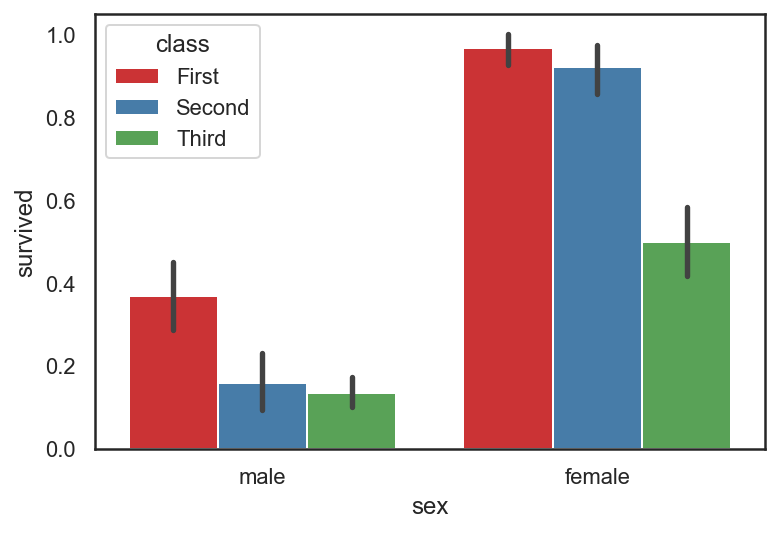

In [111]:
# class별로 성별 생존률 평균을 하나의 플롯으로
sns.barplot(data=titanic, x='sex', y='survived', hue='class')

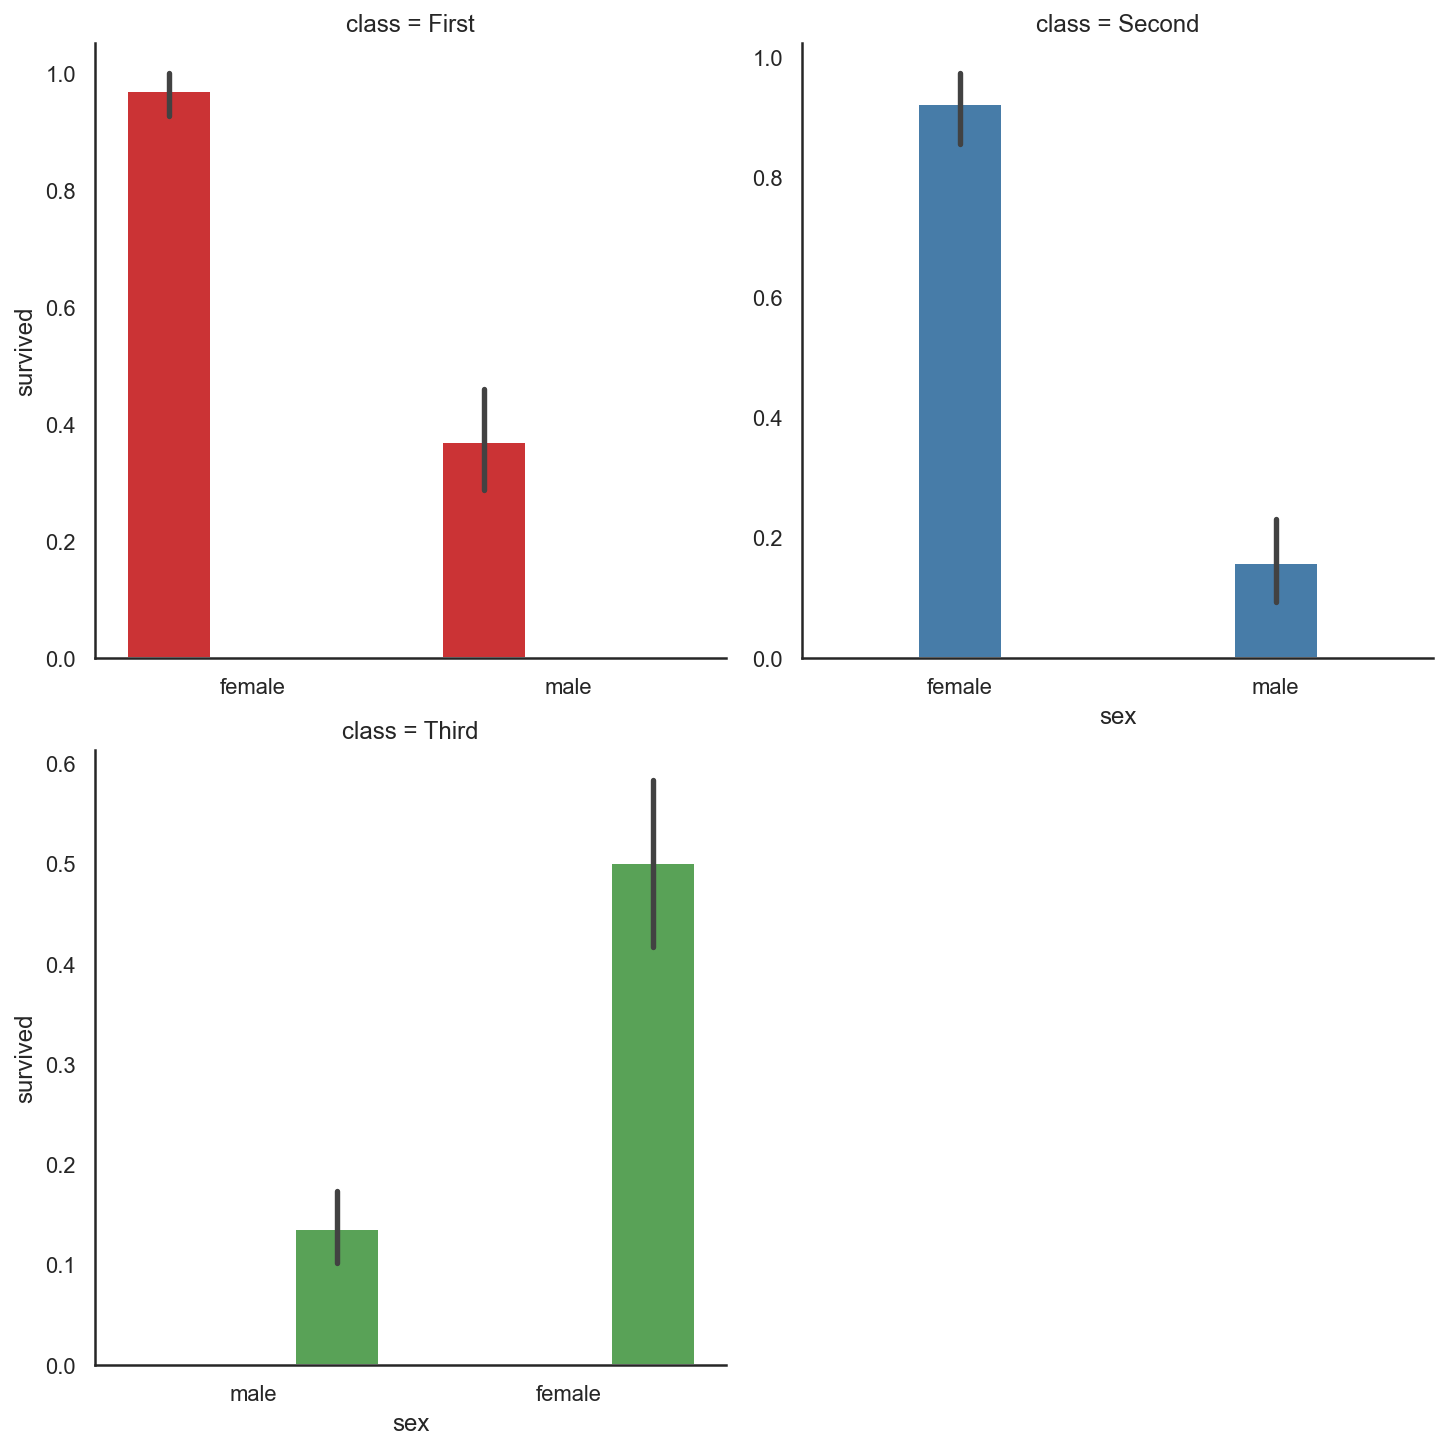

In [112]:
#class별의 성별 생존률 평균을 여러 플롯으로
sns.catplot(data=titanic, x='sex', y='survived', hue='class',kind='bar',col='class',col_wrap=2, sharey=False,sharex=False)

In [113]:
titanic.deck.isnull().sum()

688

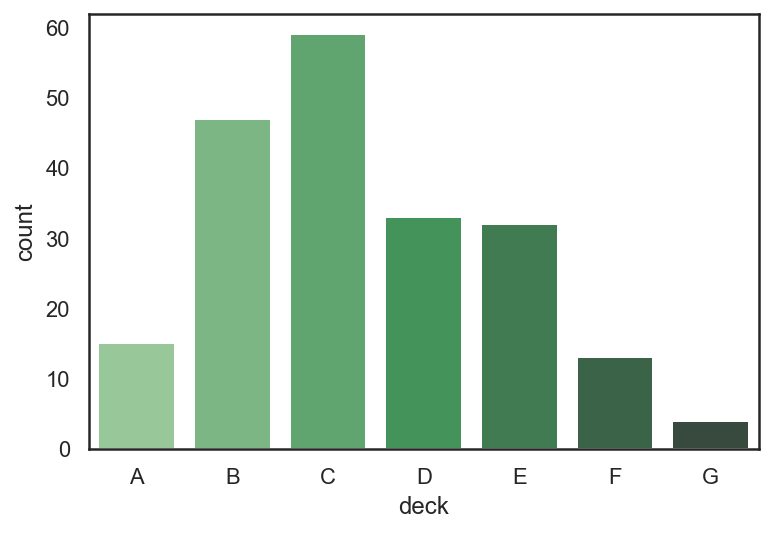

In [114]:
# deck별 관측수를 막대그래프로
sns.countplot(data=titanic, x='deck', palette='Greens_d')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='survived'>

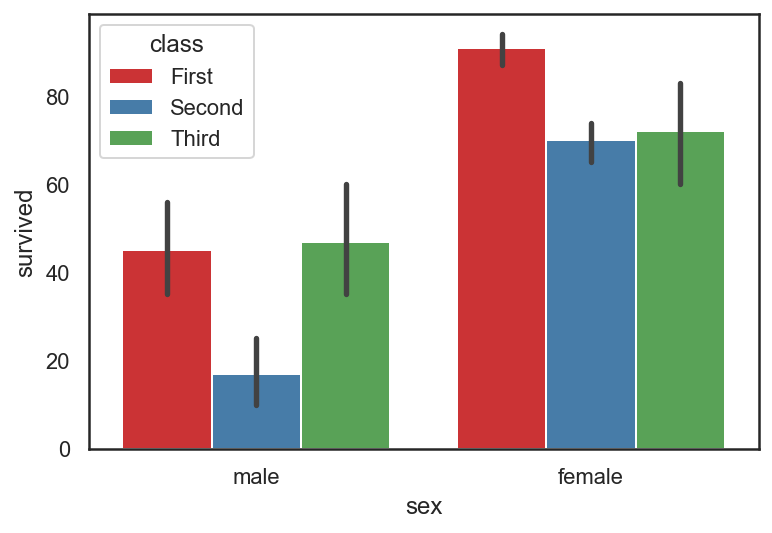

In [133]:
sns.barplot(data=titanic, x='sex', y='survived', estimator=np.sum, hue='class')

In [132]:
titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

<AxesSubplot:xlabel='class', ylabel='survived'>

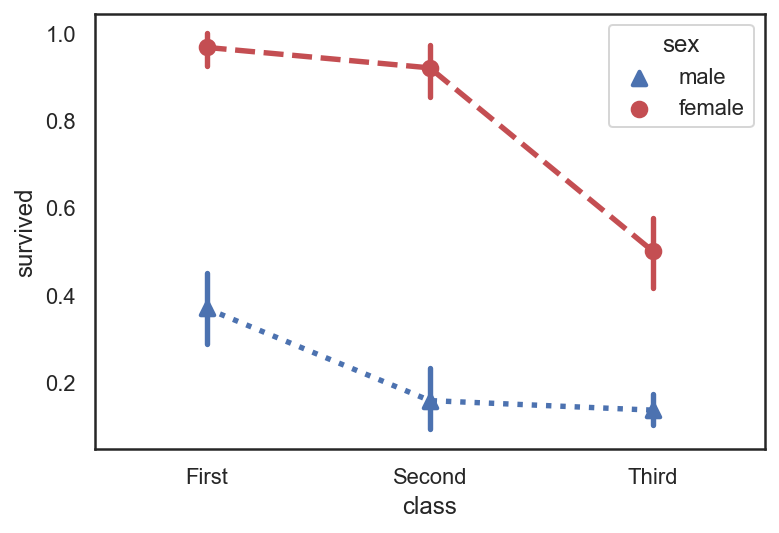

In [141]:
# class에 대한 survived값을 sex별로 pointplot
sns.pointplot(data=titanic, x='class', y='survived',hue='sex', palette={'male':'b','female':'r'}, markers=['^','o'], 
              linestyles=[':','--'])

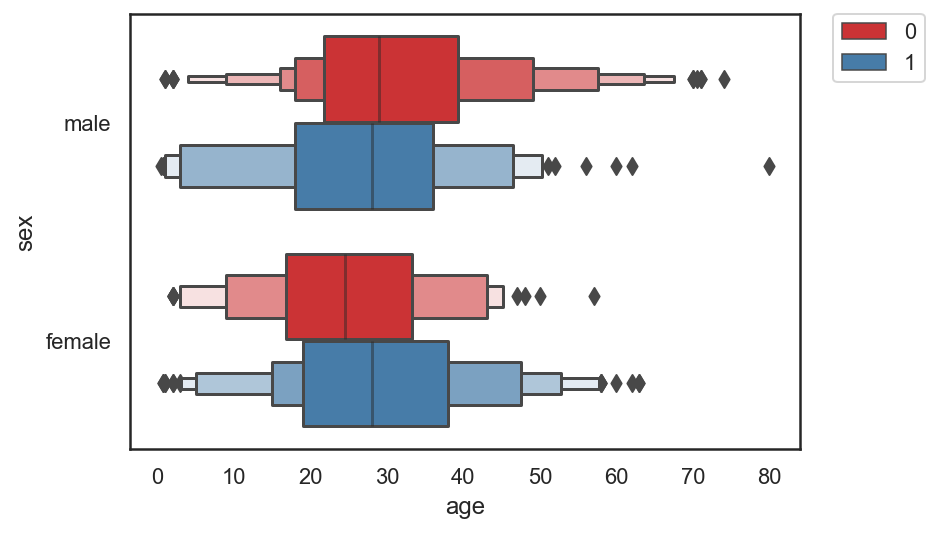

In [144]:
# boxplot, boxenplot, violinplot
sns.boxenplot(data=titanic,x='age' , y='sex', hue='survived')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

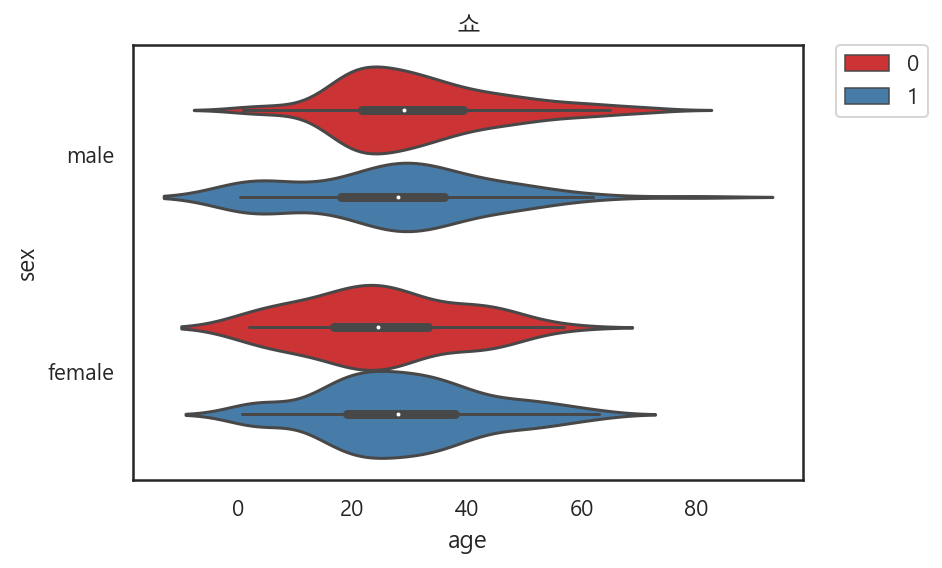

In [149]:
sns.violinplot(data=titanic,x='age' , y='sex', hue='survived')
plt.title("쇼")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

#### 3) 쌍관계 그래프

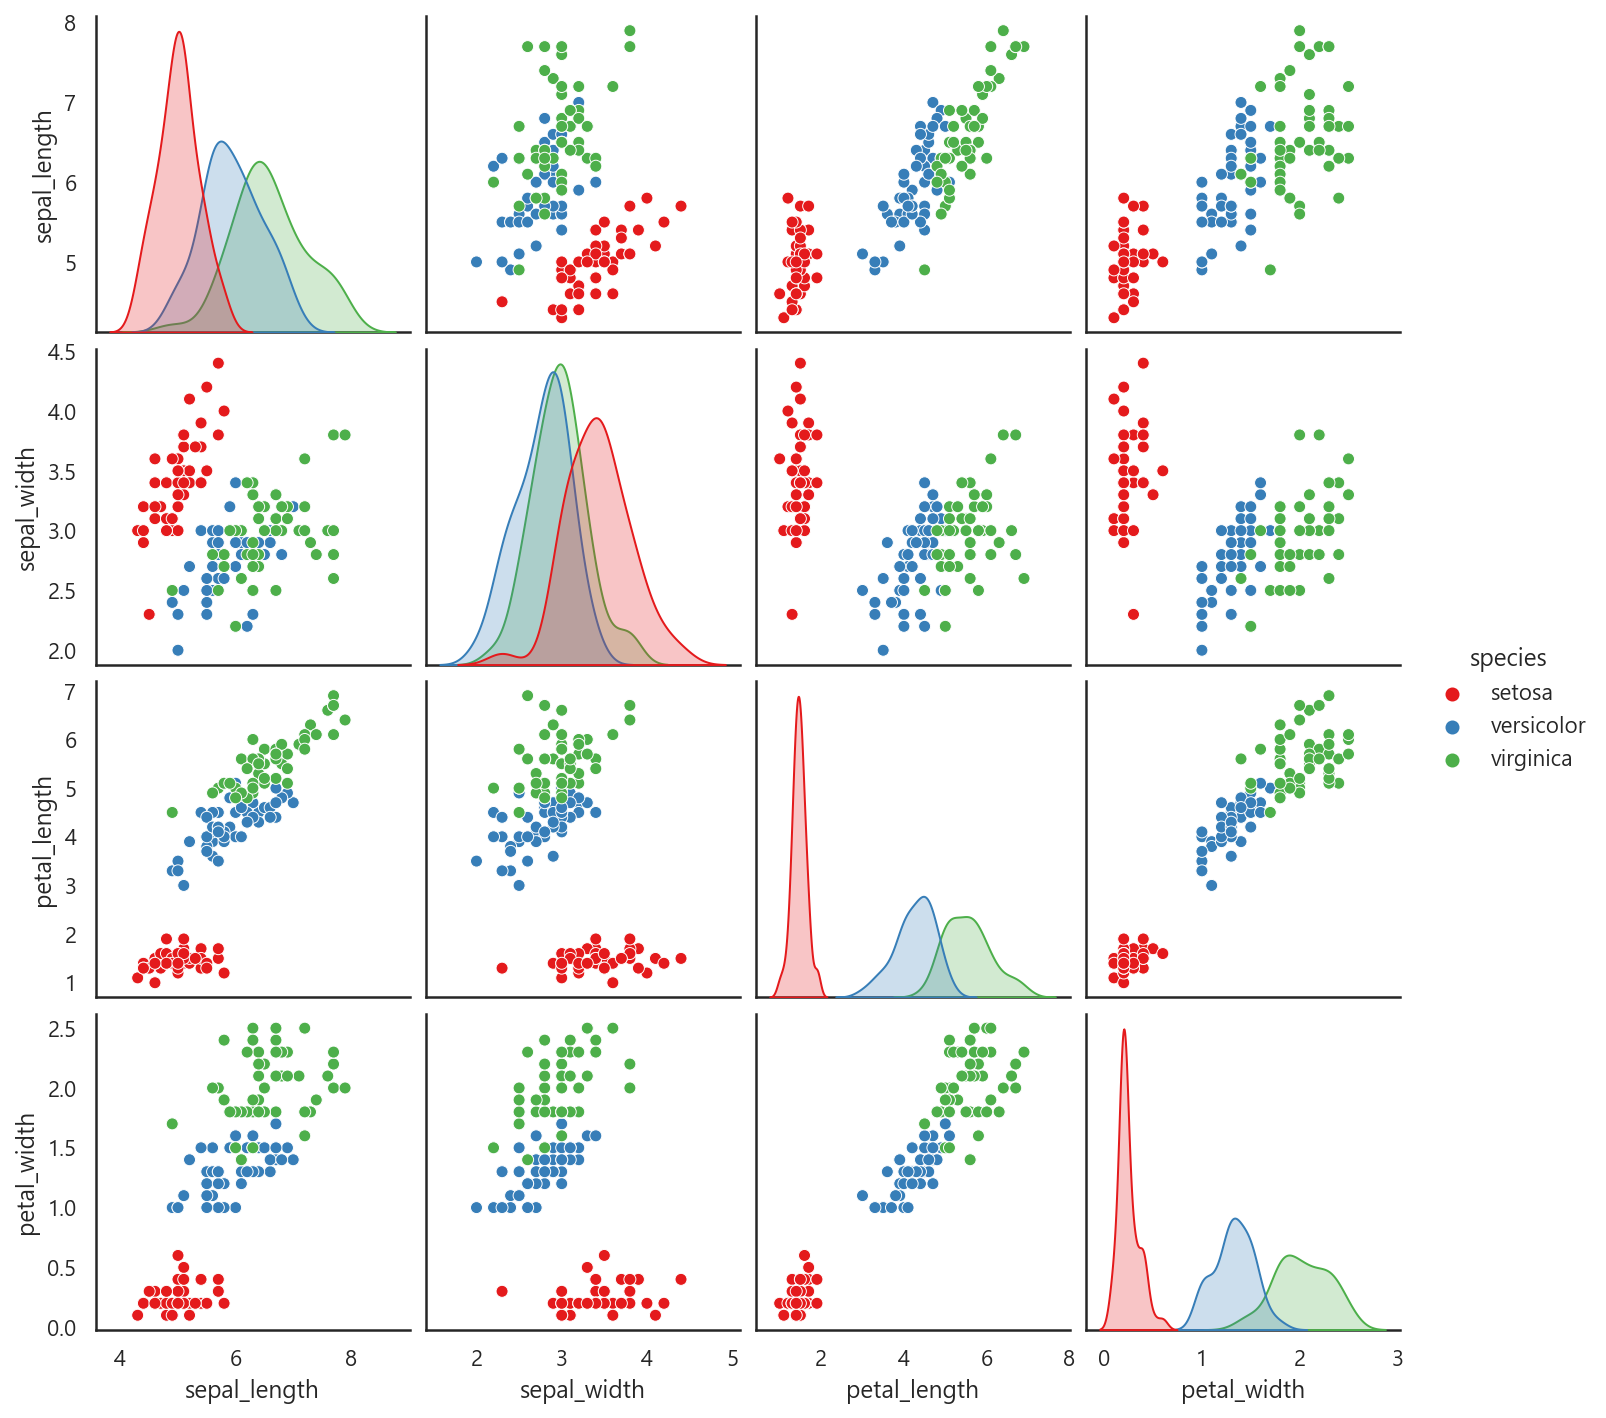

In [151]:
sns.pairplot(data=iris, hue='species')

#### 4) 밀도 그래프

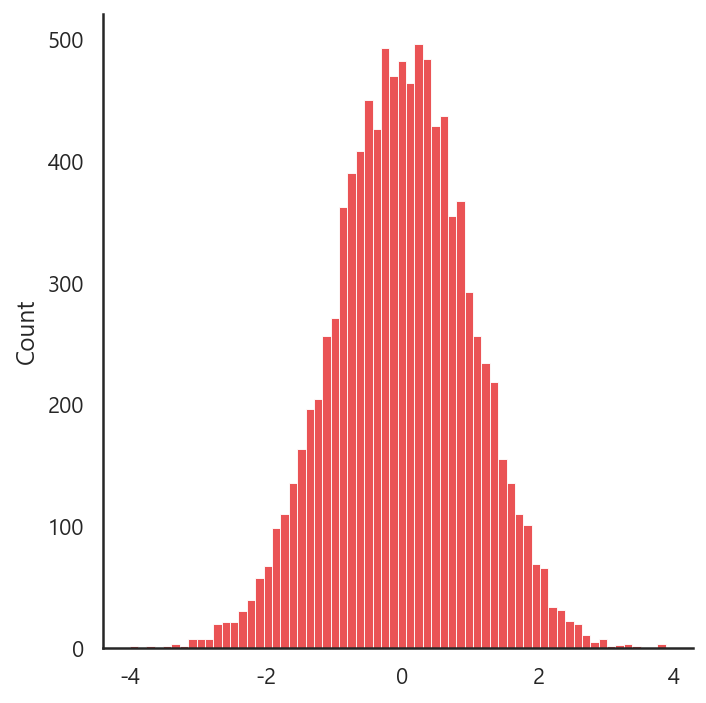

In [157]:
x=np.random.randn(10000)
sns.displot(x)

#### 5) 회귀 그래프

In [158]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

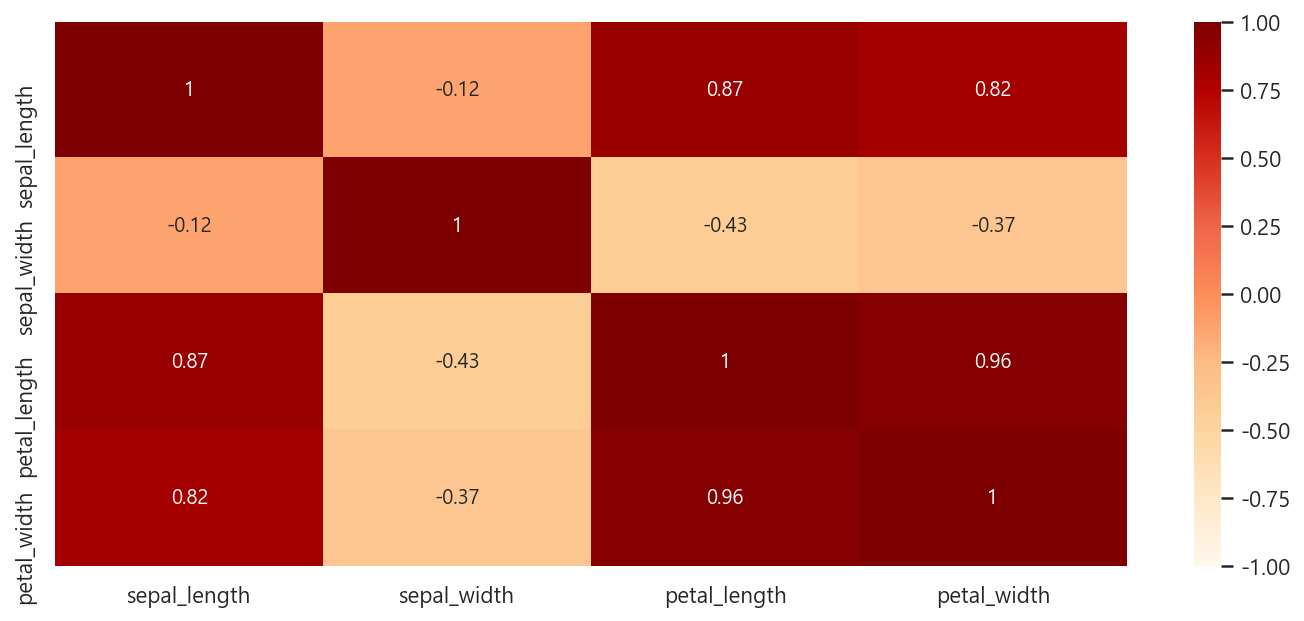

In [163]:
plt.figure(figsize=(12,5))
sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True, cmap='OrRd')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

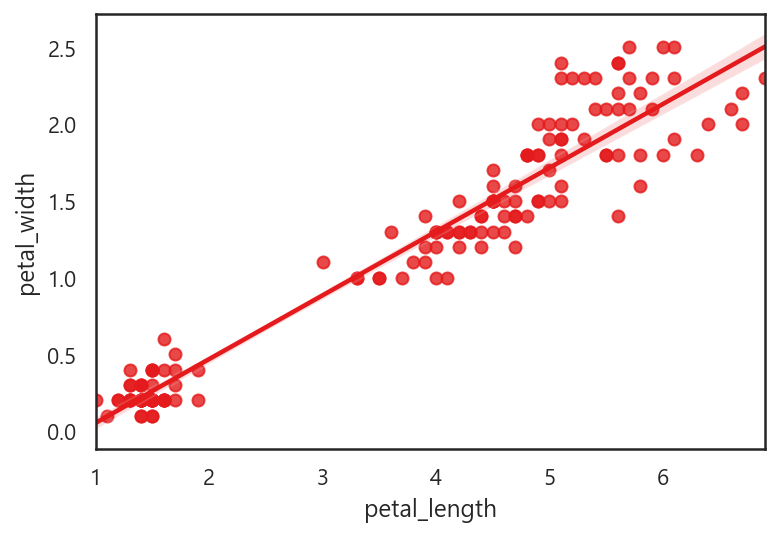

In [167]:
# 회귀모형을 만드는 함수 : regplot(hue 사용불가), lmplot
sns.regplot(data=iris,x='petal_length', y='petal_width')

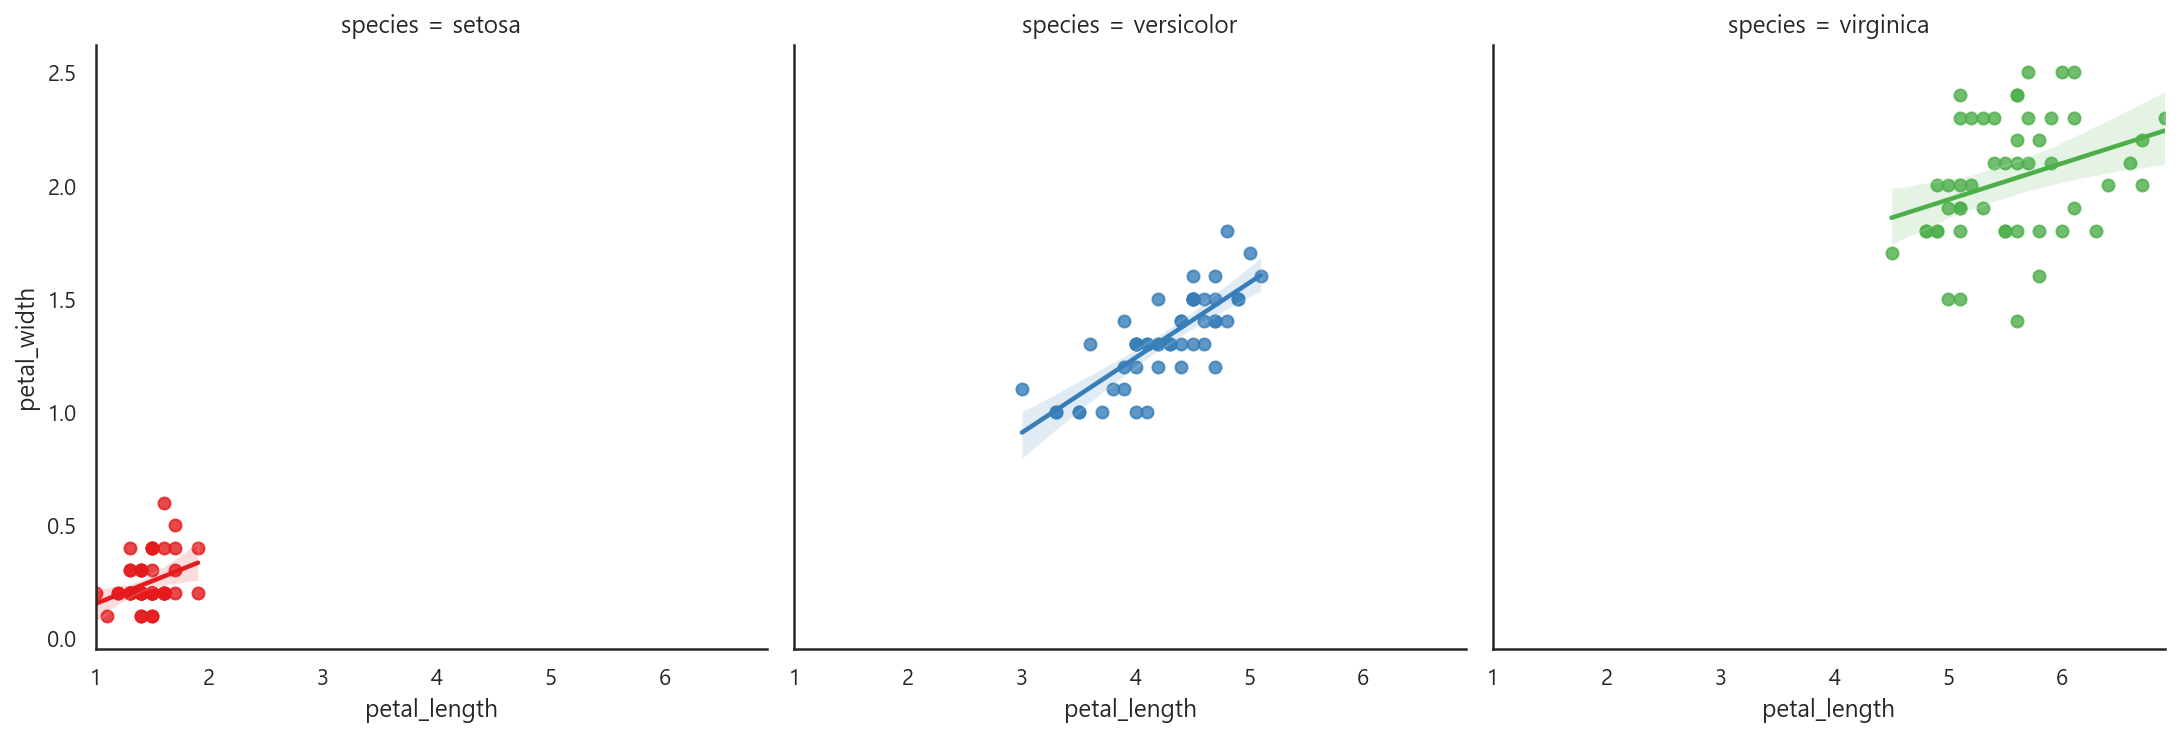

In [174]:
sns.lmplot(data=iris, x='petal_length', y='petal_width',hue='species', col='species',col_wrap=3)

### 3.5 다중 그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

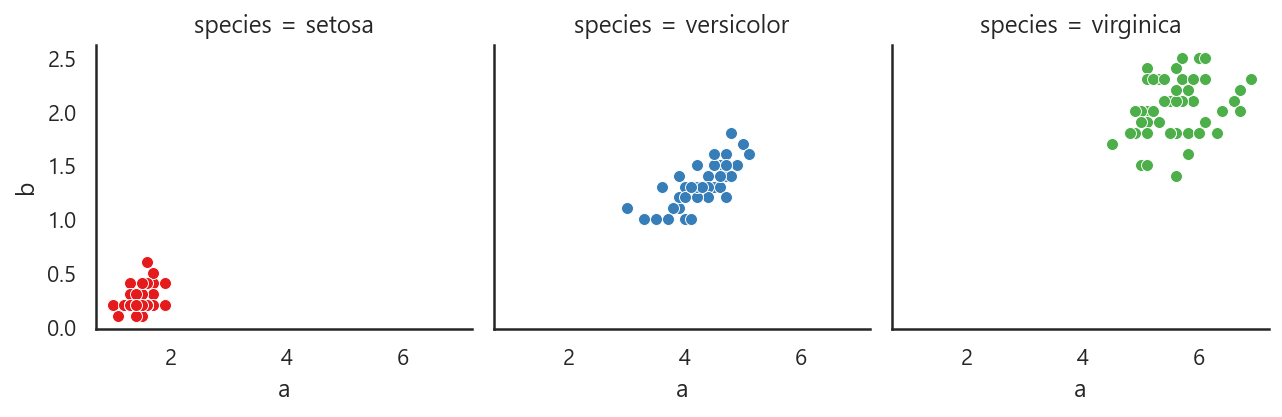

In [177]:
g = sns.FacetGrid(iris, col='species',hue='species')
g.map(sns.scatterplot,'petal_length','petal_width')
g.set_axis_labels(x_var='a',y_var='b')